<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fragen" data-toc-modified-id="Fragen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fragen</a></span></li><li><span><a href="#2050" data-toc-modified-id="2050-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2050</a></span></li></ul></div>

# Fragen

- Für 2050 mehr verhältnis Lauf zu Speicherkraft

In [1]:
from datetime import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timezone
plt.rcParams.update({'figure.max_open_warning': 0})
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import savgol_filter

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from gekko import GEKKO

var = "consumption"
#var = "production"
import matplotlib
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "deu_deu")

dti_2030 = pd.date_range('2030-01-01', periods=8760, freq='H')
dti_2050 = pd.date_range('2050-01-01', periods=8760, freq='H')

In [2]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")
print("There is currently no clean way to add the weeknumber since index.week is deprecated")
print("This function creates them with a loop and the funciton isocalendar")
print("Name: CreateWeekNum ")
print("Input: df_Source ")
print("Output: list of weeknumbers")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")
def CreateWeekNum(df_Source):
    li_weeknum = []
    for rows in range(0,len(df_Source),1):
        li_weeknum.append(df_Source.index[rows].isocalendar()[1])
    return li_weeknum    


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
There is currently no clean way to add the weeknumber since index.week is deprecated
This function creates them with a loop and the funciton isocalendar
Name: CreateWeekNum 
Input: df_Source 
Output: list of weeknumbers
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


In [3]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")
print("Little helper function to add various time related columns to dataframes")
print("Name: DataFrameTimeIndexing ")
print("Input: df_Source ")
print("Output: added columns to DataFrame")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ ")
def DataFrameTimeIndexing(dfSource):
    dfSource['year'] = dfSource.index.year
    dfSource['quarter'] = dfSource.index.quarter
    dfSource['month'] = dfSource.index.month
    dfSource['week'] = CreateWeekNum(dfSource)
    dfSource['date'] = dfSource.index.day
    dfSource['hour'] = dfSource.index.hour
    return

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Little helper function to add various time related columns to dataframes
Name: DataFrameTimeIndexing 
Input: df_Source 
Output: added columns to DataFrame
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


In [4]:
df_UBA_2030 = pd.read_csv("../Data/Szen_UBA-2030.csv"
                     ,delimiter = ';')
df_UBA_2030 = df_UBA_2030.set_index(dti_2030)
DataFrameTimeIndexing(df_UBA_2030)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df_GPC_2030 = pd.read_csv("../Data/Szen_GPC-2030.csv"
                     ,delimiter = ';')
df_GPC_2030 = df_GPC_2030.set_index(dti_2030)
DataFrameTimeIndexing(df_GPC_2030)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df_IGW_2030 = pd.read_csv("../Data/Szen_IGW-2030.csv"
                     ,delimiter = ';')
df_IGW_2030 = df_IGW_2030.set_index(dti_2030)
DataFrameTimeIndexing(df_IGW_2030)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [5]:
df_UBA_2050 = pd.read_csv("../Data/Szen_UBA-2050.csv"
                     ,delimiter = ';')
df_UBA_2050 = df_UBA_2050.set_index(dti_2050)
DataFrameTimeIndexing(df_UBA_2050)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df_GPC_2050 = pd.read_csv("../Data/Szen_GPC-2050.csv"
                     ,delimiter = ';')
df_GPC_2050 = df_GPC_2050.set_index(dti_2050)
DataFrameTimeIndexing(df_GPC_2050)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df_FHT_2050 = pd.read_csv("../Data/Szen_FHT-2050.csv"
                     ,delimiter = ';')
df_FHT_2050 = df_FHT_2050.set_index(dti_2050)
DataFrameTimeIndexing(df_FHT_2050)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [6]:
df_UBA_2050.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2050-01-01 00:00:00 to 2050-12-31 23:00:00
Freq: H
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8760 non-null   object 
 1   Biomasse                     8760 non-null   float64
 2   Hydro                        8760 non-null   float64
 3   Solar                        8760 non-null   float64
 4   Wind                         8760 non-null   float64
 5   Geot                         8760 non-null   float64
 6   Last                         8760 non-null   float64
 7   carbon_intensity_import_avg  8760 non-null   float64
 8   Erneuerbar                   8760 non-null   float64
 9   Residuallast                 8760 non-null   float64
 10  year                         8760 non-null   int64  
 11  quarter                      8760 non-null   int64  
 12  month                        876

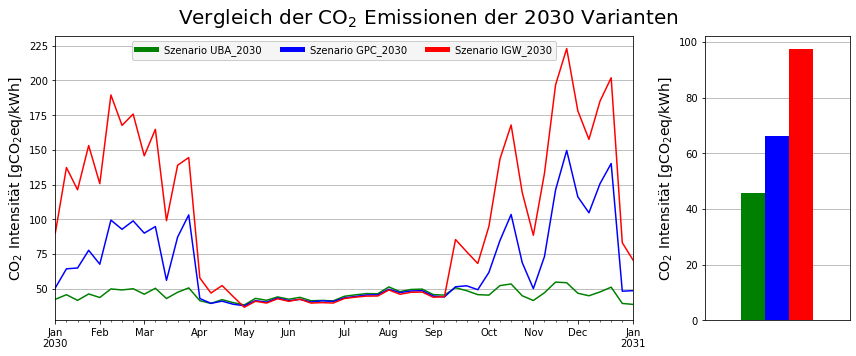

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12, 5),gridspec_kw={'width_ratios': [4, 1]})

li_Color = ["green","blue","red"]



li_Legend = ["Szenario UBA_2030","Szenario GPC_2030","Szenario IGW_2030"]
df_To_Plot = pd.DataFrame()
df_To_Plot["UBA_2030_CO2"] = df_UBA_2030["CO2_Intensity"]
df_To_Plot["GPC_2030_CO2"] = df_GPC_2030["CO2_Intensity"]
df_To_Plot["IGW_2030_CO2"] = df_IGW_2030["CO2_Intensity"]



df_To_Plot.resample("W").mean().plot(kind = "line", ax = ax[0], color = li_Color)

ax[0].set_ylabel("CO$_2$ Intensität [gCO$_2$eq/kWh]", fontsize = 14);

leg = ax[0].legend( labels = li_Legend, ncol = 5, loc = "upper center",handlelength = 2,
               facecolor='#f5f5f5', framealpha=1)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
ax[0].yaxis.grid(True)



li_Color = ["green","blue","red"]

li_Legend = ["Szenario UBA_2030","Szenario GPC_2030","Szenario IGW_2030"]

df_To_Plot = pd.DataFrame()

df_To_Plot["UBA_Mean_CO2"] = pd.Series(df_UBA_2030["CO2_Intensity"].mean())
df_To_Plot["GPC_Mean_CO2"] = pd.Series(df_GPC_2030["CO2_Intensity"].mean())
df_To_Plot["IGW_Mean_CO2"] = pd.Series(df_IGW_2030["CO2_Intensity"].mean())

df_To_Plot.plot(kind = "bar", ax = ax[1], color = li_Color, zorder = 3, legend = False)

ax[1].set_ylabel("CO$_2$ Intensität [gCO$_2$eq/kWh]", fontsize = 14);
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax[1].yaxis.grid(True)
ax[1].set_xticklabels([""])

fig.suptitle("Vergleich der CO$_2$ Emissionen der 2030 Varianten", fontsize=20)



pos = ax[0].get_position()
pos.y1 = 0.95   #height
ax[0].set_position(pos) 



plt.tight_layout()
plt.savefig("../Bilder/2030/Vergleich/CO2_Emissionen", bbox_inches = 'tight',pad_inches = 0.08)

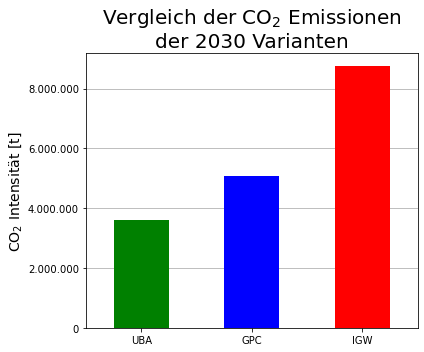

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

li_Color = ["green","blue","red"]

li_Legend = ["Szenario UBA_2030","Szenario GPC_2030","Szenario IGW_2030"]
df_To_Plot = pd.DataFrame()


li_To_Plot = ["Biomasse_CO2_Sum","Hydro_CO2_Sum","Solar_CO2_Sum","Wind_CO2_Sum","Geot_CO2_Sum",
             "PSP_CO2_Sum","H2_CO2_Sum","Gas_CO2_Sum","Import_CO2_Sum"]

df_To_Plot["UBA_Sum_CO2"] = df_UBA_2030[li_To_Plot].sum() / 1e6
df_To_Plot["GPC_Sum_CO2"] = df_GPC_2030[li_To_Plot].sum() / 1e6
df_To_Plot["IGW_Sum_CO2"] = df_IGW_2030[li_To_Plot].sum() / 1e6
df_To_Plot.sum().plot(kind = "bar", ax = ax, color = li_Color, zorder = 3)

ax.set_ylabel("CO$_2$ Intensität [t]", fontsize = 14);
ax.set_title("Vergleich der CO$_2$ Emissionen\nder 2030 Varianten", fontsize = 20);

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, loc: locale.format_string('%d', x, 1)))
ax.yaxis.grid(True)
ax.set_xticklabels(["UBA","GPC","IGW"], rotation = "horizontal")
plt.tight_layout()
plt.savefig("../Bilder/2030/Vergleich/CO2_Emissionen_Summiert", bbox_inches = 'tight',pad_inches = 0.08)

# 2050

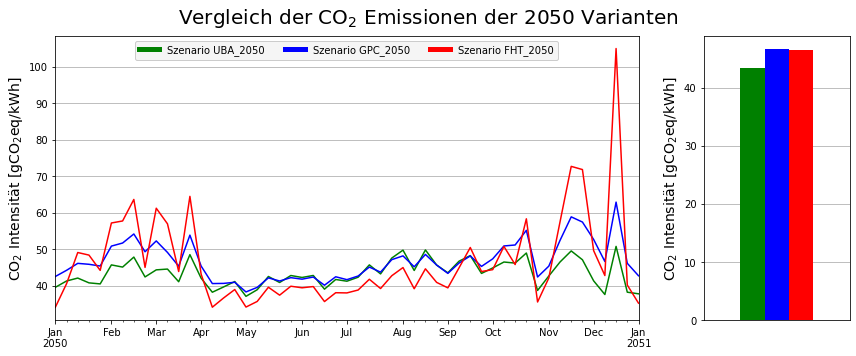

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12, 5),gridspec_kw={'width_ratios': [4, 1]})

li_Color = ["green","blue","red"]



li_Legend = ["Szenario UBA_2050","Szenario GPC_2050","Szenario FHT_2050"]
df_To_Plot = pd.DataFrame()
df_To_Plot["UBA_2050_CO2"] = df_UBA_2050["CO2_Intensity"]
df_To_Plot["GPC_2050_CO2"] = df_GPC_2050["CO2_Intensity"]
df_To_Plot["FHT_2050_CO2"] = df_FHT_2050["CO2_Intensity"]



df_To_Plot.resample("W").mean().plot(kind = "line", ax = ax[0], color = li_Color)

ax[0].set_ylabel("CO$_2$ Intensität [gCO$_2$eq/kWh]", fontsize = 14);

leg = ax[0].legend( labels = li_Legend, ncol = 5, loc = "upper center",handlelength = 2,
               facecolor='#f5f5f5', framealpha=1)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
ax[0].yaxis.grid(True)



li_Color = ["green","blue","red"]

li_Legend = ["Szenario UBA_2050","Szenario GPC_2050","Szenario FHT_2050"]

df_To_Plot = pd.DataFrame()

df_To_Plot["UBA_Mean_CO2"] = pd.Series(df_UBA_2050["CO2_Intensity"].mean())
df_To_Plot["GPC_Mean_CO2"] = pd.Series(df_GPC_2050["CO2_Intensity"].mean())
df_To_Plot["FHT_Mean_CO2"] = pd.Series(df_FHT_2050["CO2_Intensity"].mean())

df_To_Plot.plot(kind = "bar", ax = ax[1], color = li_Color, zorder = 3, legend = False)

ax[1].set_ylabel("CO$_2$ Intensität [gCO$_2$eq/kWh]", fontsize = 14);
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax[1].yaxis.grid(True)
ax[1].set_xticklabels([""])

fig.suptitle("Vergleich der CO$_2$ Emissionen der 2050 Varianten", fontsize=20)



pos = ax[0].get_position()
pos.y1 = 0.95   #height
ax[0].set_position(pos) 



plt.tight_layout()
plt.savefig("../Bilder/2050/Vergleich/CO2_Emissionen", bbox_inches = 'tight',pad_inches = 0.08)

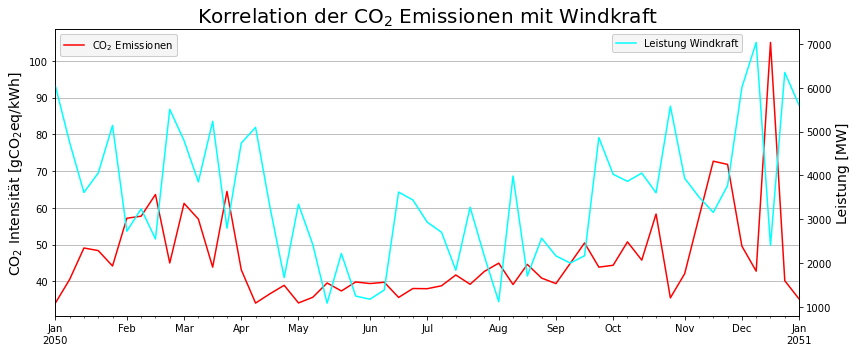

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))

ax2 = ax.twinx()



df_To_Plot = pd.DataFrame()

df_FHT_2050["CO2_Intensity"].resample("W").mean().plot(kind = "line", ax = ax, color = "red")
df_FHT_2050["Wind"].resample("W").mean().plot(kind = "line", ax = ax2, color = "cyan")

ax.set_ylabel("CO$_2$ Intensität [gCO$_2$eq/kWh]", fontsize = 14);
ax2.set_ylabel("Leistung [MW]", fontsize = 14);
ax.set_title("Korrelation der CO$_2$ Emissionen mit Windkraft", fontsize = 20);

leg = ax.legend( labels = ["CO$_2$ Emissionen"], loc = "upper left",handlelength = 2,
               facecolor='#f5f5f5', framealpha=1)
leg2 = ax2.legend( labels = ["Leistung Windkraft"], ncol = 5, loc = "upper right",handlelength = 2,
               facecolor='#f5f5f5', framealpha=1, bbox_to_anchor=(0.93,1))
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig("../Bilder/2050/Vergleich/CO2_Emissionen_Korr", bbox_inches = 'tight',pad_inches = 0.08)

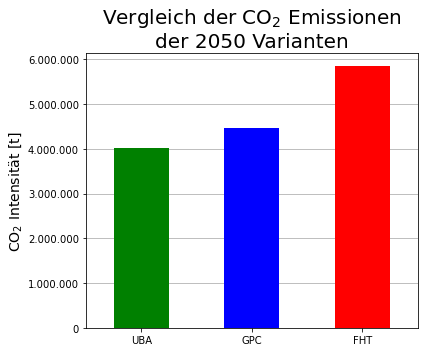

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))

li_Color = ["green","blue","red"]

li_Legend = ["Szenario UBA_2050","Szenario GPC_2050","Szenario IGW_2050"]
df_To_Plot = pd.DataFrame()


li_To_Plot = ["Biomasse_CO2_Sum","Hydro_CO2_Sum","Solar_CO2_Sum","Wind_CO2_Sum","Geot_CO2_Sum",
             "PSP_CO2_Sum","H2_CO2_Sum","Gas_CO2_Sum","Import_CO2_Sum"]

df_To_Plot["UBA_Sum_CO2"] = df_UBA_2050[li_To_Plot].sum() / 1e6
df_To_Plot["GPC_Sum_CO2"] = df_GPC_2050[li_To_Plot].sum() / 1e6
df_To_Plot["FHT_Sum_CO2"] = df_FHT_2050[li_To_Plot].sum() / 1e6
df_To_Plot.sum().plot(kind = "bar", ax = ax, color = li_Color, zorder = 3)

ax.set_ylabel("CO$_2$ Intensität [t]", fontsize = 14);
ax.set_title("Vergleich der CO$_2$ Emissionen\nder 2050 Varianten", fontsize = 20);

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, loc: locale.format_string('%d', x, 1)))
ax.yaxis.grid(True)
ax.set_xticklabels(["UBA","GPC","FHT"], rotation = "horizontal")
plt.tight_layout()
plt.savefig("../Bilder/2050/Vergleich/CO2_Emissionen_Summiert", bbox_inches = 'tight',pad_inches = 0.08)